In [6]:
import requests
import numpy as np
import pandas as pd
import pylab as pl
import seaborn as sns
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn import linear_model, datasets
from sklearn import preprocessing
from sklearn import svm
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from mpl_toolkits.mplot3d import Axes3D

In [8]:
def plot_multi_roc_curve(y,pred,classes):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = metrics.roc_curve(y[:, i],pred[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    #print(fpr)
    #print(tpr)
    #print(roc_auc)
    colors = ['aqua','darkorange','yellow','green','blue','black']
    for i,color in zip(range(len(classes)),colors):
        plt.plot(fpr[i], tpr[i], color=color, label='ROC curve of class {0} (area = {1:0.2f})'''.format(classes[i], roc_auc[i]))
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--',label = 'root')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [4]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [23]:
# 3D Plot
def plot_3d_graph(feature_x, feature_y, feature_z, feature_name_x, feature_name_y, feature_name_z, labels):
    fig = plt.figure(1, figsize=(7, 5))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    plt.cla()
    ax.scatter(feature_x, feature_y, feature_z, c=labels)

    #ax.w_xaxis.set_ticklabels([])
    #ax.w_yaxis.set_ticklabels([])
    #ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel(feature_name_x)
    ax.set_ylabel(feature_name_y)
    ax.set_zlabel(feature_name_z)
    plt.show()

In [26]:
binarizer = preprocessing.LabelBinarizer()
iris = datasets.load_iris()
iris.data
X = iris.data[:, :3]  # we only take the first two features.
#print(X)
Y = binarizer.fit_transform(iris.target)
#print(Y)
#h = .02  # step size in the mesh
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=.33,random_state=0)

In [27]:
##################Train the model#################################
clf = OneVsRestClassifier(svm.SVC())
clf.fit(X=X_train,y=y_train)
score_knn = cross_val_score(clf, X_train, y_train, cv=4)
print("Cross Validation score : " + str(score_knn))
print("Cross Validation Mean score : " + str(score_knn.mean()))  

Cross Validation score : [ 0.88  1.    0.96  0.88]
Cross Validation Mean score : 0.93


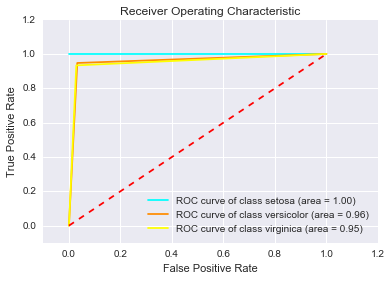

In [28]:
##################Test the model#################################
y_predict = clf.predict(X_test)
plot_multi_roc_curve(y_test, y_predict,iris.target_names)

Confusion matrix, without normalization
[[16  0  0]
 [ 0 18  1]
 [ 0  1 14]]


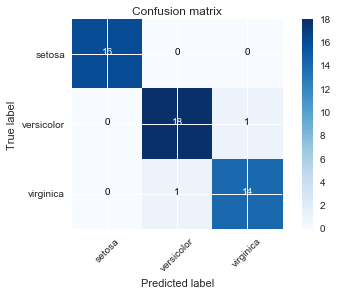

In [29]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
y_test_non_bz = binarizer.inverse_transform(y_test)
#print(y_predict)
y_predict_non_bz = binarizer.inverse_transform(y_predict)

cnf_matrix = confusion_matrix(y_test_non_bz, y_predict_non_bz,labels=[0,1,2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=iris.target_names,title='Confusion matrix')

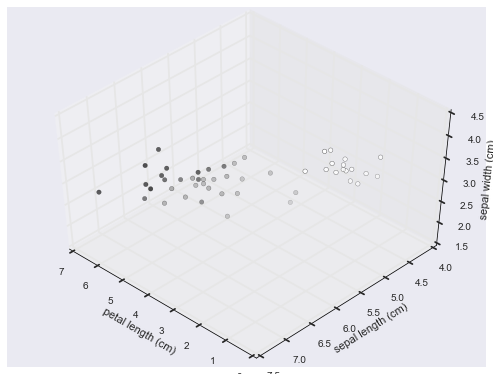

In [30]:
plot_3d_graph(X_test[:,2], X_test[:,0], X_test[:,1], 
              iris.feature_names[2], iris.feature_names[0], iris.feature_names[1], y_predict_non_bz)